<a href="https://colab.research.google.com/github/ShubhamBhawsar2001/ML-project/blob/main/logisticregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from numpy import linalg as LA
from numpy import save
from numpy import load
import math
from sklearn import preprocessing
import pandas as pd

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [99]:
data=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Diabetes.csv")

names = data.iloc[:,0:8].columns
out=data.iloc[:,8:9]
#normalize the given data
data=preprocessing.normalize(data.iloc[:,0:8])
data = pd.DataFrame(data,columns=names)
data['outcome']=out
print(data)
x=data.iloc[:,0:8]
x['b']=1




     Pregnancies   Glucose  BloodPressure  SkinThickness   Insulin       BMI  \
0       0.033552  0.827625       0.402628       0.195722  0.000000  0.187893   
1       0.008424  0.716040       0.555984       0.244296  0.000000  0.224079   
2       0.040398  0.924097       0.323181       0.000000  0.000000  0.117658   
3       0.006612  0.588467       0.436392       0.152076  0.621527  0.185797   
4       0.000000  0.596386       0.174127       0.152361  0.731335  0.187622   
..           ...       ...            ...            ...       ...       ...   
763     0.042321  0.427443       0.321640       0.203141  0.761779  0.139236   
764     0.013304  0.811526       0.465629       0.179600  0.000000  0.244788   
765     0.026915  0.651352       0.387582       0.123811  0.602905  0.141037   
766     0.006653  0.838285       0.399184       0.000000  0.000000  0.200257   
767     0.007915  0.736052       0.554018       0.245351  0.000000  0.240602   

     DiabetesPedigreeFunction       Age

In [100]:

n=len(data)
#number of training data
n_train=math.ceil(n*0.8)
x_train=x.iloc[0:n_train,:]
y_train=out.iloc[0:n_train]
#test data
n_test=n-n_train
x_test=x.iloc[n_train:n,:]
y_test=out.iloc[n_train:n]


print (f"X_train: {x_train.shape}, y_train: {y_train.shape}")

print (f"X_test: {x_test.shape}, y_test: {y_test.shape}")

X_train: (615, 9), y_train: (615, 1)
X_test: (153, 9), y_test: (153, 1)


# sigmoid **function** 

In [101]:
def sigmoid(x):
  return 1/(1+np.exp(-x))

# **loss function**
here we use log loss function
j(hw(x),y)=-sigma[ y*log{hw(x)} + (1-y)*log{1-hw(x)} ]


here y_hat is hw(x)

In [102]:
def lossfind(y,y_hat):
  return -np.mean(y*np.log(y_hat)+(1-y)*np.log(1-y_hat))
print(y_train)

     Outcome
0          1
1          0
2          1
3          0
4          1
..       ...
610        0
611        1
612        1
613        0
614        1

[615 rows x 1 columns]


In [103]:
"""
m=len(x_train)
alpha=0.0001
lembda=10
n_col=len(x_train.columns)
w=np.random.randn(n_col,1)
y_pred=np.dot(x_train,w)

y_hat=sigmoid(y_pred)


tmo=np.log(y_hat)
df = pd.DataFrame(tmo, columns = ['np.log(y_hat)'])
df['hat']=y_hat
df['y']=y_train
df['np.log(1-y_hat)']=np.log(1-y_hat)

df['1-y']=1-y_train
loss=lossfind(y_train,y_hat)
print(loss)
df.head(500)
"""

"\nm=len(x_train)\nalpha=0.0001\nlembda=10\nn_col=len(x_train.columns)\nw=np.random.randn(n_col,1)\ny_pred=np.dot(x_train,w)\n\ny_hat=sigmoid(y_pred)\n\n\ntmo=np.log(y_hat)\ndf = pd.DataFrame(tmo, columns = ['np.log(y_hat)'])\ndf['hat']=y_hat\ndf['y']=y_train\ndf['np.log(1-y_hat)']=np.log(1-y_hat)\n\ndf['1-y']=1-y_train\nloss=lossfind(y_train,y_hat)\nprint(loss)\ndf.head(500)\n"

#  using gradient decent to find opytimal value 

In [105]:
itr=0
m=len(x_train)
alpha=0.8

n_col=len(x_train.columns)
w=np.random.randn(n_col,1)
wlist=[]
losslist=[]
itrlist=[]
while(itr!=200):
  y_pred=np.dot(x_train,w)
  y_hat=sigmoid(y_pred)
  loss=lossfind(y_train,y_hat)
  if itr==99:
    print(f"itr:{itr}, loss{loss}")
  
  
  
  gw=(1/m)*np.dot(x_train.transpose(),(y_hat-y_train))
  w=w-alpha*gw
  wlist.append(w)
  itrlist.append(itr)
  losslist.append(loss)
  itr=itr+1
  

print(w)

itr:99, lossOutcome    0.623928
dtype: float64
[[-0.73491539]
 [ 1.31450736]
 [-1.87333326]
 [-0.55369399]
 [ 0.53192156]
 [-0.35964559]
 [-0.22951134]
 [-0.02342903]
 [-0.82581786]]


**Accuracy finding**

In [106]:
y_pred=np.dot(x_train,w)
y_hat=sigmoid(y_pred)
count=0

for i in range (0,m):
  if y_hat[i,0]>0.5 and y_train.iloc[i][0]==1:
   count+=1
  elif ( y_hat[i,0]<0.5 and y_train.iloc[i][0]==0):
    count+=1
accuracy=(count/m)*100
print(accuracy)

64.8780487804878


In [107]:
y_pred=np.dot(x_test,w)
y_hat=sigmoid(y_pred)
count=0
m=len(x_test)
for i in range (0,m):
  if y_hat[i,0]>0.5 and y_train.iloc[i][0]==1:
   count+=1
  elif ( y_hat[i,0]<0.5 and y_train.iloc[i][0]==0):
    count+=1
accuracy=(count/m)*100
print(accuracy)

64.05228758169935


**plot of loss vs iteration**

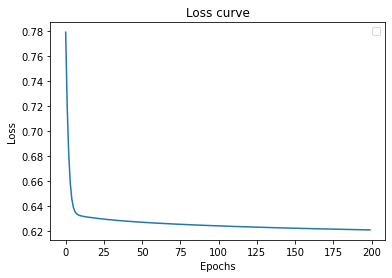

In [108]:
plt.title("Loss curve")
plt.xlabel("Epochs")
plt.ylabel("Loss")



plt.plot(itrlist, losslist)
plt.legend()
plt.show()